In [1]:
import pandas as pd
df_service=pd.read_csv('Service_Data.csv')
df_log=pd.read_csv('Log_Data02.csv')
df_service.info()
df_log.info()

In [3]:
grouped_stats1 = df_service.groupby(['서비스명', '판매자', '서비스번호'])['평점'].describe()
grouped_stats2 = df_log.groupby(['서비스명', '판매자', '서비스번호'])['평점'].describe()
grouped_stats1 = grouped_stats1.drop(['count','std'],axis=1)
grouped_stats2 = grouped_stats2.drop(['count','std'],axis=1)

In [24]:
# 1. 값이 정확히 같은지 전체 비교 (DataFrame 단위)
전체_동일 = grouped_stats1.equals(grouped_stats2)
print("전체 값이 완전히 같은가? →", 전체_동일)

전체 값이 완전히 같은가? → False


In [27]:
# 2. 값이 다른 부분 찾기
차이나는_행 = (grouped_stats1 != grouped_stats2)

# 3. 하나라도 다른 행만 추출
diff_indices = 차이나는_행.any(axis=1)
차이나는_데이터 = pd.concat([
    grouped_stats1[diff_indices].add_suffix('_service'),
    grouped_stats2[diff_indices].add_suffix('_log')
], axis=1)

print("차이 나는 행 수:", diff_indices.sum())
print(차이나는_데이터)

차이 나는 행 수: 151
                                                          mean_service  \
서비스명                                   판매자        서비스번호                  
"개발 공부 전 필독" IT 서비스 기본 개념 Ebook을 드립니다. DDAAC      3361.0           4.8   
.NET 기반 웹사이트/API 제작                    닷JYL       3740.0           4.9   
C, C, JAVA, DB 프로그램 제작에 도움을 드립니다.      프로그래밍고오수   2945.0           4.9   
C언어, 파이썬, 웹 프로그래밍, 프로젝트도와드립니다.         rigelko    2465.0           4.9   
DB, 설계, 쿼리튜닝 및 엑셀, 데이터정리 해 드립니다.       가이버박       3011.0           4.9   
...                                                                ...   
풀스택 개발자가 웹 퍼블리싱을 해 드립니다.               show4you   2703.0           4.9   
필요하신 웹사이트를 검색해 드립니다.                   도라지        3252.0           4.6   
해외 구매대행 쇼핑 웹 크롤링해 드립니다.                stonemodoo 2754.0           4.9   
홈페이지 유지보수 수정 디버깅해 드립니다.                10년차웹개발자   2625.0           4.9   
홈페이지끝판왕 카페24 cafe24 디자인수정 기능개선         카페24전문     2208.0           4.9   

                      

In [28]:
# 2. 값이 다른 부분 찾기
차이나는_행 = (grouped_stats1.round(1) != grouped_stats2.round(1))

# 3. 하나라도 다른 행만 추출
diff_indices = 차이나는_행.any(axis=1)
차이나는_데이터 = pd.concat([
    grouped_stats1[diff_indices].add_suffix('_service'),
    grouped_stats2[diff_indices].add_suffix('_log')
], axis=1)

print("차이 나는 행 수:", diff_indices.sum())
print(차이나는_데이터)

차이 나는 행 수: 0
Empty DataFrame
Columns: [mean_service, min_service, 25%_service, 50%_service, 75%_service, max_service, mean_log, min_log, 25%_log, 50%_log, 75%_log, max_log]
Index: []


In [29]:
grouped_stats1.round(1).equals(grouped_stats2.round(1))

True

# 누적 평점 = 평점 => 가설 사용 불가능 
* 전문가의 특성이 고객 만족도에 영향을 미칠 것이다. 
### 고객 만족도 = 평점 이라고 생각 but  서비스의 자체 평점 = 평점 -> 피쳐 사용 불가 

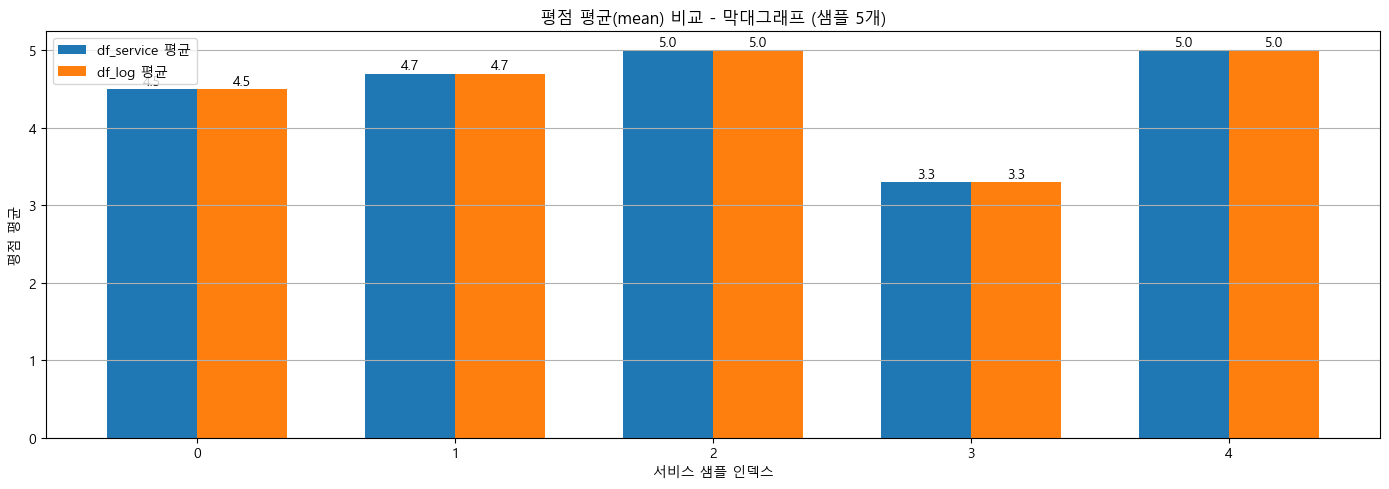

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 비교 대상 추출
mean1 = grouped_stats1['mean'].round(1).reset_index(drop=True)
mean2 = grouped_stats2['mean'].round(1).reset_index(drop=True)

# 샘플 선택
mean1_sample = mean1[225:230]
mean2_sample = mean2[225:230]

# x축 설정
x = np.arange(len(mean1_sample))
width = 0.35

# 그래프
plt.figure(figsize=(14, 5))
bars1 = plt.bar(x - width/2, mean1_sample, width, label='df_service 평균')
bars2 = plt.bar(x + width/2, mean2_sample, width, label='df_log 평균')

# 막대 위에 수치 표시
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.1f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.1f}', ha='center', va='bottom')

# 꾸미기
plt.title('평점 평균(mean) 비교 - 막대그래프 (샘플 5개)')
plt.xlabel('서비스 샘플 인덱스')
plt.ylabel('평점 평균')
plt.xticks(x)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()